# Cat Horrigan BIOS 512 Final Project #
 ====================================
 
This project will utilize data on ramen ratings, coming
from 2018 TidyTuesday data (which can be found here
https://github.com/rfordatascience/tidytuesday/blob/master/data/2019/2019-06-
04/ramen_ratings.csv)

### First the data needs to be read into a csv

In [3]:
library(tidyverse)

In [4]:
ramen_ratings = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-06-04/ramen_ratings.csv',
col_types = cols())
ramen_ratings |> head()

review_number,brand,variety,style,country,stars
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
3180,Yum Yum,Tem Tem Tom Yum Moo Deng,Cup,Thailand,3.75
3179,Nagatanien,tom Yum Kung Rice Vermicelli,Pack,Japan,2.00
3178,Acecook,Kelp Broth Shio Ramen,Cup,Japan,2.50
3177,Maison de Coree,Ramen Gout Coco Poulet,Cup,France,3.75
3176,Maruchan,Gotsumori Shio Yakisoba,Tray,Japan,5.00
3175,Myojo,Chukazanmai Tantanmen,Cup,Japan,3.50


## We can see here that each row has data for a review number, brand, variety, style, country, and rating out of five stars.
### Let’s see the distribution of styles of ramen in this data set.

style,count
<chr>,<int>
Bar,1
Bowl,612
Box,32
Can,1
Cup,559
Pack,1832
Restaurant,3
Tray,138
NA,2


review_number,style,country,style_sorted
<dbl>,<chr>,<chr>,<fct>
3180,Cup,Thailand,Cup
3179,Pack,Japan,Pack
3178,Cup,Japan,Cup
3177,Cup,France,Cup
3176,Tray,Japan,Tray
3175,Cup,Japan,Cup


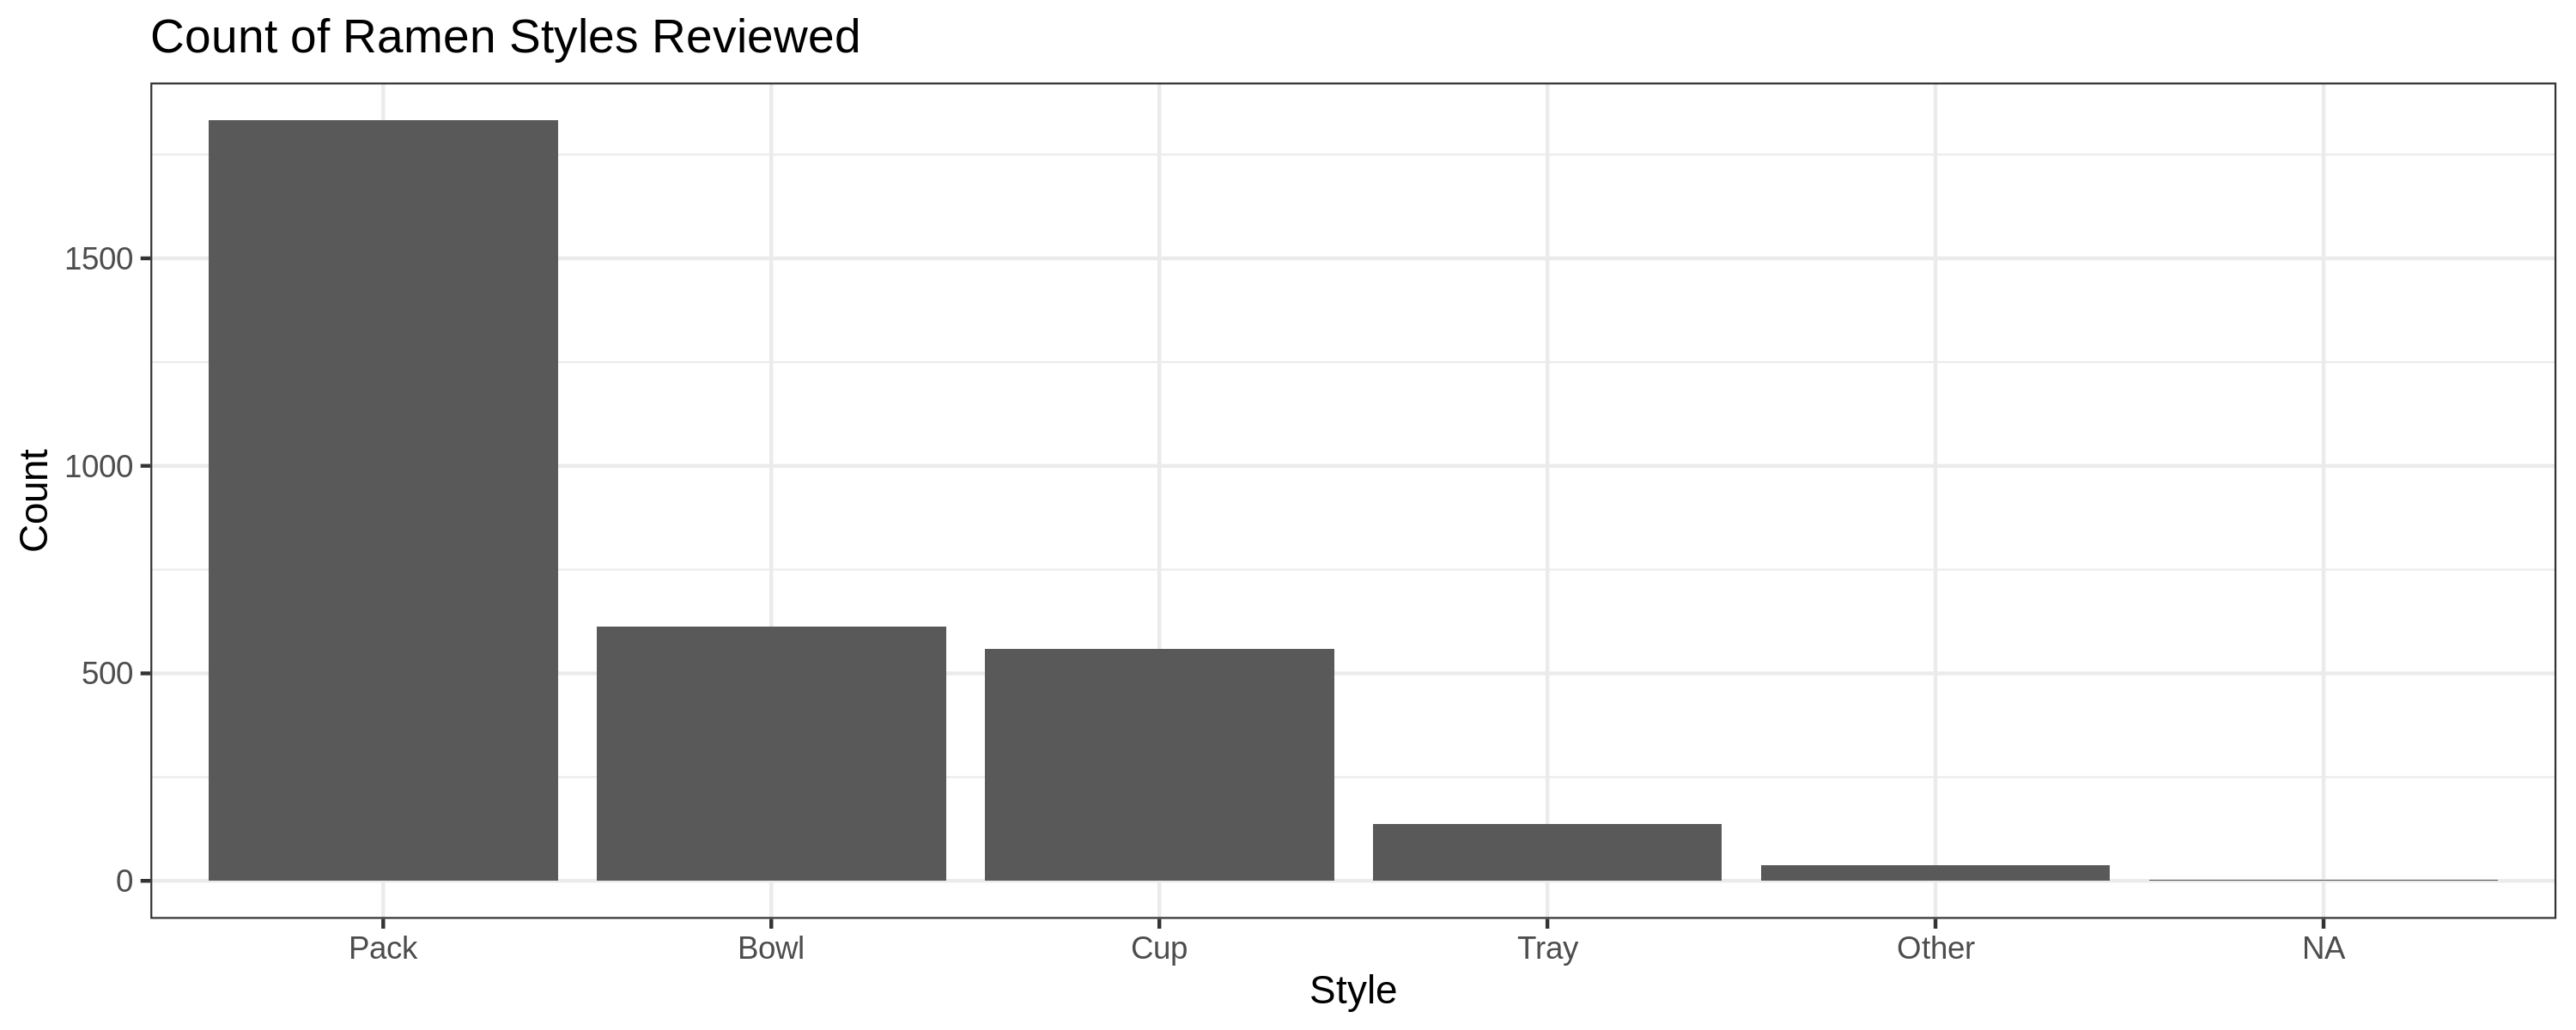

In [72]:
ramen_ratings |>
group_by(style) |>
summarize(count = n())
filter_count = ramen_ratings |>
select(review_number, style, country) |>
mutate(style_sorted = style %>% fct_lump(n=4) %>% fct_infreq())
filter_count |> head()
p = ggplot(filter_count, aes(x= style_sorted)) + geom_bar() +
labs(title="Count of Ramen Styles Reviewed",
y ="Count", x = "Style") + theme_bw()
p

This was achieved by taking the ramen_reviews data set and grouping the observations by 'style' value. A new tibble was created with the column 'count', which logged the number of observations per 'style' in the ramen data table. 
By creating 'filter_count', a new, more succint table was created where 'style' could be treated as a factor and grouped by frequency. This then allowed us to make a bar chart of the frequency of each style. In ggplot you cannot make a bar chart out of a table with only two columns/variables, so this is why the second method was used and we couldn't just use the 'ramen_ratings' tibble that was created when we summarized by count.

This chart shows us that the majority of the ramen reviewed was pack-style ramen –
like the Maruchan you love! Bowl is the second-most common, and bar, can, restaurant
and NA were the least common, therefore they were lumped.

## Now let's map the countries of origin for the ramen that was reviewed

country,count
<chr>,<int>
Australia,25
Bangladesh,11
Brazil,12
Cambodia,5
Canada,48
China,207
Colombia,6
Dubai,3
Estonia,2


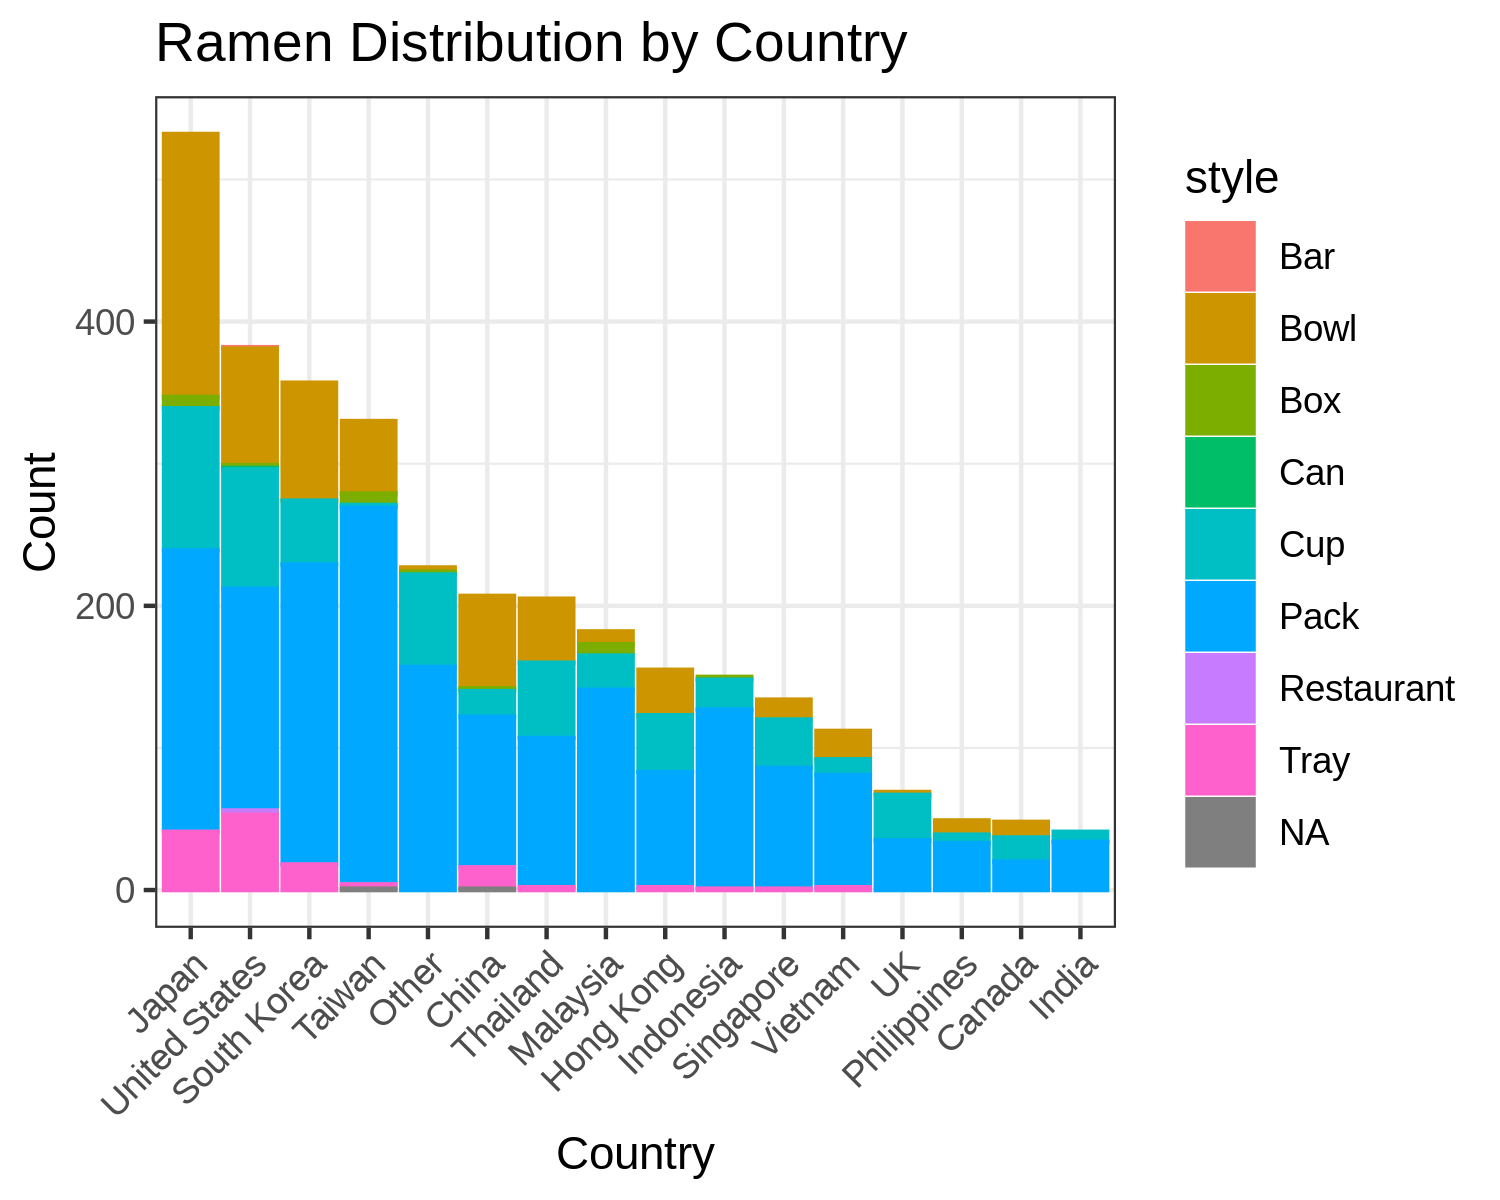

In [16]:
ramen_ratings |>
    group_by(country) |>
    summarize(count = n())
filter_count = ramen_ratings |>
    select(review_number, style, country) |>
    mutate(country_sorted = country %>% fct_lump(n=15) %>% fct_infreq())
#filter_count |> head()
p = ggplot(filter_count, aes(x= country_sorted, color = style, fill = style)) + geom_bar() +
labs(title="Ramen Distribution by Country",
y ="Count", x = "Country") + theme_bw() + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
p

A smiliar method was used to produce this visualization. By creating a new table with fewer variables it was easier to group the observations by country. This way the frequency of observations for each country could be compared. It's possible to do this without creating a new data table, but I like to see both a table and a visualization to help me fully comprehend the data and its distribution. 

Here we can see that the majority of the ramen that was reviewed came from Japan. The second most common country of origin was the United States.
Many Asian countries where noodles are a mainstay of traditional cuisine were also included in this dataset.

## What is the average rating by country?

To do this, a new table called 'star' is created. 'Star' takes ramen_ratings and groups the data by country. A new variable, average_rating is then created, which takes the mean stars (rating) value for each group (country). We have to indicate na.rm = TRUE so that observations with no recorded rating aren't included in the data/calculation. A bar graph could be used to visualize this data, but it couldn't be done using 'star' since that is another 6x2 tibble. 

country,average_rating
<chr>,<dbl>
Australia,3.260000
Bangladesh,3.590909
Brazil,4.041667
Cambodia,4.200000
Canada,2.255208
China,3.467633


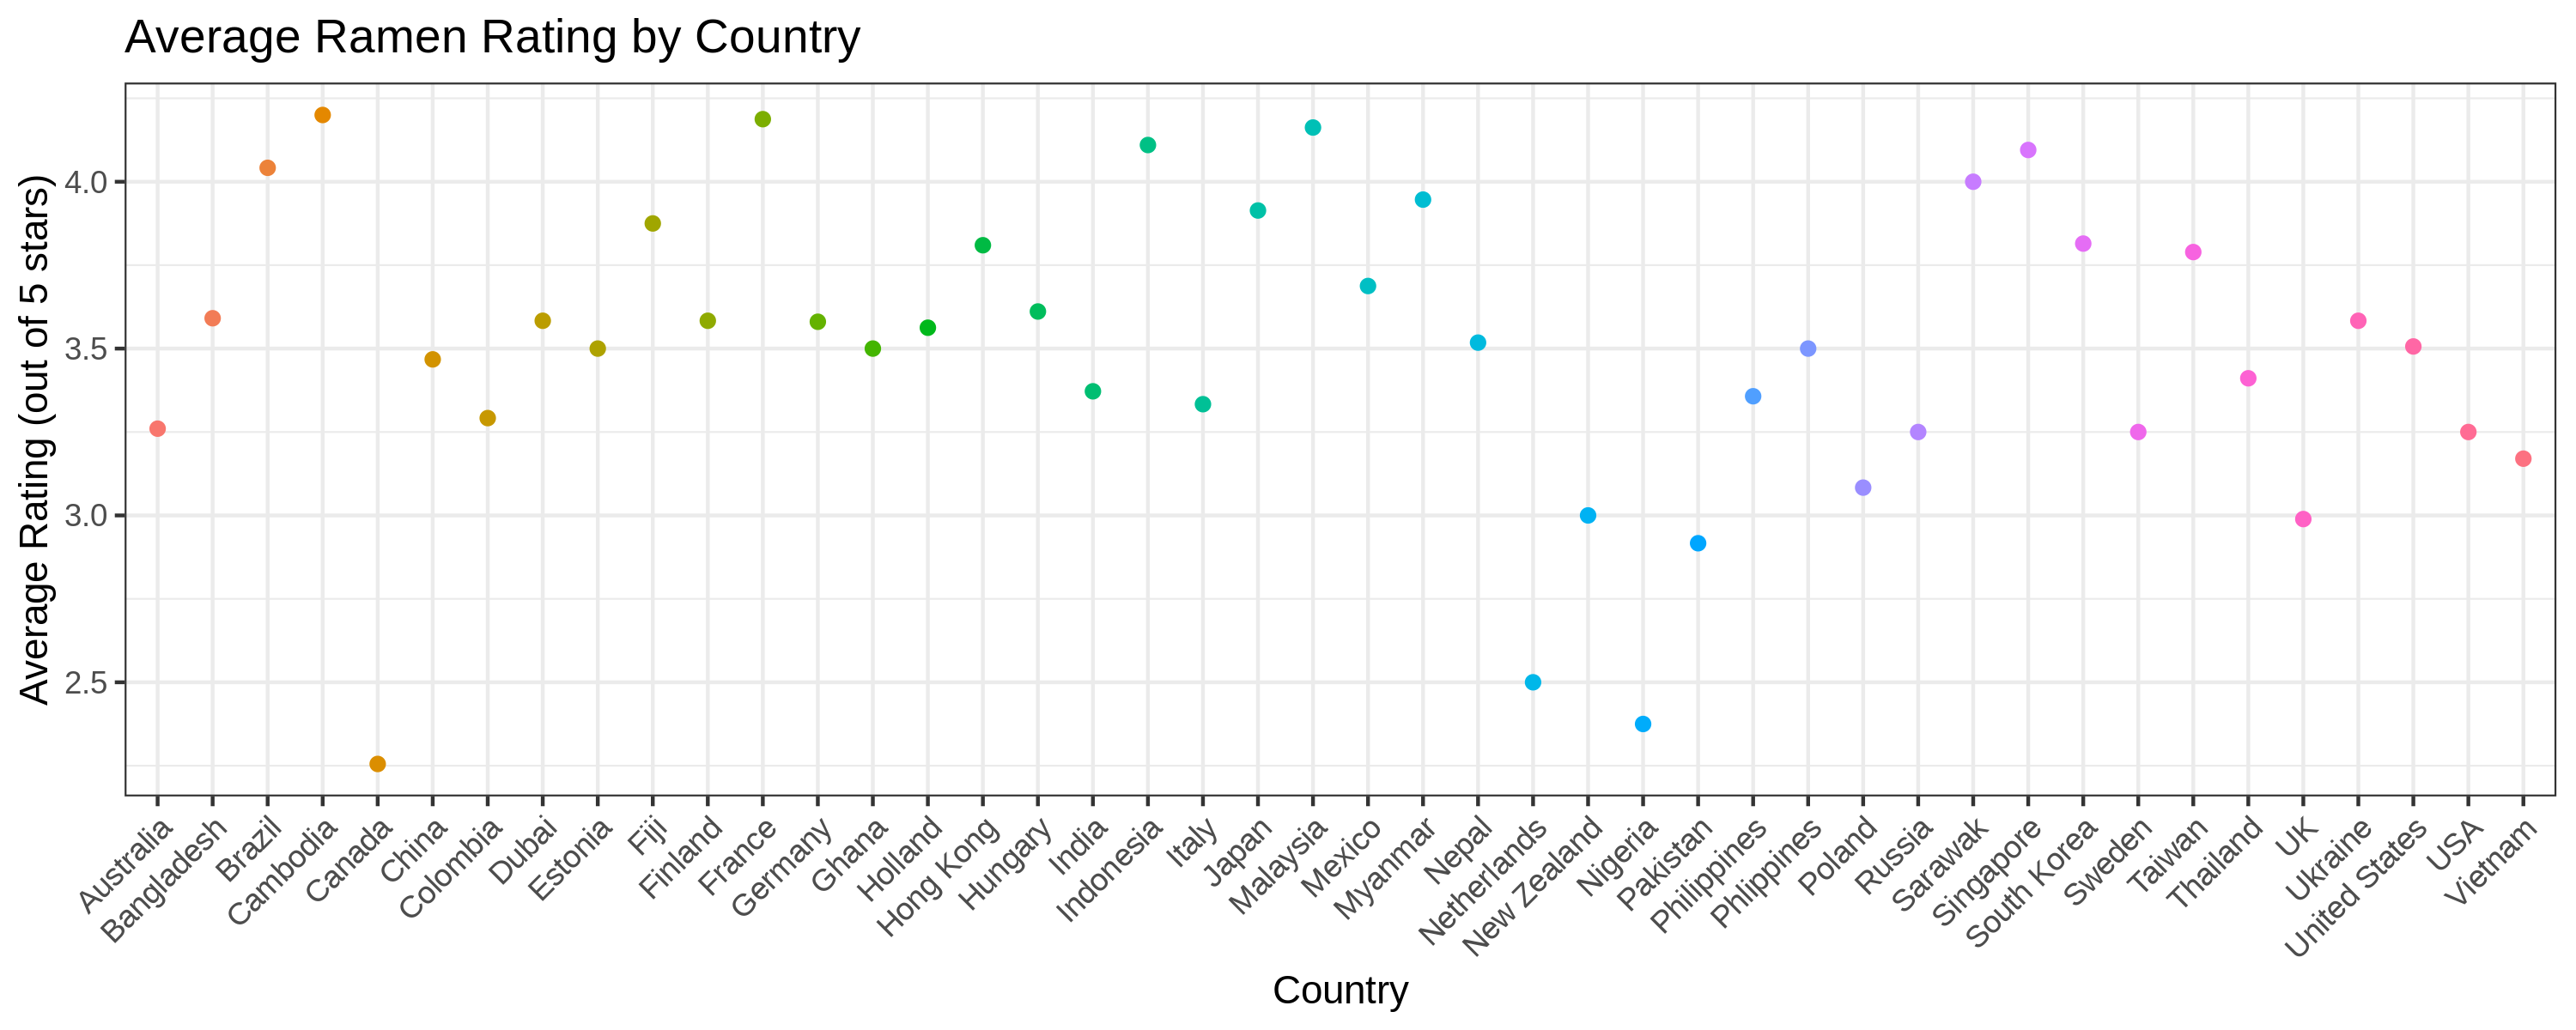

In [73]:
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res = 300)
star = ramen_ratings |>
    group_by(country) |>
    #summarize(count = n())
    #summarize(average_rating = (sum(stars)/n(), na.rm=TRUE))
    summarize(average_rating = mean(stars, na.rm=TRUE))
star |> head()
p = ggplot(star, aes(x=country, y=average_rating, color = country)) + geom_point() +
labs(title="Average Ramen Rating by Country",
y ="Average Rating (out of 5 stars)", x = "Country") + theme_bw() + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + theme(legend.position="none")
p


In [55]:
star |> slice_max(order_by = average_rating, n=5)
star |> slice_min(order_by = average_rating, n=5)

country,average_rating
<chr>,<dbl>
Cambodia,4.200000
France,4.187500
Malaysia,4.162431
Indonesia,4.110000
Singapore,4.095149


country,average_rating
<chr>,<dbl>
Canada,2.255208
Nigeria,2.375000
Netherlands,2.500000
Pakistan,2.916667
UK,2.989130


We can see here that Cambodia had the highest average rating, and Canada had the lowest average rating.

We use the 'star' table here, which only has two columns: country and average rating. The slice_min and slice_max functions take the top or bottom n values (where n = 5) ordered by 'average_rating'.